# Titanic - Learning Models

This runs the new training sets against several models firgure out which is best.  These models were pulled from https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

In [142]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train_df = pd.read_csv("new_train.csv")
test_df = pd.read_csv("new_test.csv")
train_df

,Survived,Pclass,Sex,Age,Fare,Title,Relatives,FareRatio,Deck,AgeClass
0,0,3,0,2,7,0,1,3,8,6
1,1,1,1,5,71,1,1,35,2,5
2,1,3,1,3,7,2,0,7,8,9
3,1,1,1,5,53,1,1,26,2,5
4,0,3,0,5,8,0,0,8,8,15
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,13,5,0,13,8,6
887,1,1,1,2,30,2,0,30,1,2
888,0,3,1,5,23,2,3,5,8,15
889,1,1,0,3,30,0,0,30,2,3


In [143]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

## Stochastic Gradient Descent (SGD)

In [144]:
from sklearn import linear_model

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

## Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import SGDClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

## Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## K Nearest Neighbor

In [147]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

## Gaussian Naive Bayes

In [148]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

## Perceptron

In [149]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=50)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

## Linear Support Vector Machine

In [150]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC(max_iter=100000)
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Decision Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

## Results!

In [152]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
94.39,Random Forest
94.39,Decision Tree
85.63,KNN
79.91,Support Vector Machines
79.80,Logistic Regression
71.94,Stochastic Gradient Decent
71.83,Perceptron
71.27,Naive Bayes


In [153]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.204
Sex,0.166
Fare,0.156
FareRatio,0.128
Relatives,0.079
Deck,0.071
AgeClass,0.071
Age,0.063
Pclass,0.062


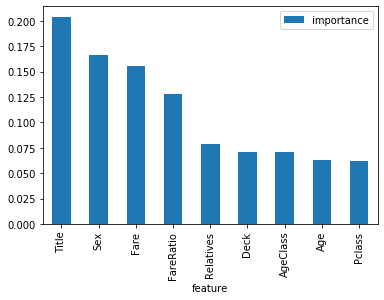

In [154]:
importances.plot.bar()